<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/CIFAR10_02_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 classification

In [ ]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Import and inspect the data

In [ ]:
Ts = T.Compose([T.ToTensor(),   # Compose function group together some transformers into one object
                T.Resize(32*4),
                T.Grayscale(num_output_channels= 1)
                ])

In [ ]:
cdata_trans = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10


In [ ]:
# inspect the data

# the categories (but how many classes??)
print(cdata_trans.classes)
print(str(len(cdata_trans.classes)) + ' classes')

print('\nData size:')
print(cdata_trans.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata_trans.targets))
print(type(cdata_trans.data))

# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata_trans.data)
print('\nAfter converting: \n')
print(type(cdataT))

# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)
print('\nOriginal data Shape:\n',cdataT.data.shape)

# Creating variables for data reshaping
numPics = cdata_trans.data.shape[0]
numPixels = cdata_trans.data.shape[1]
numChans = cdata_trans.data.shape[3]

images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>

After converting: 

<class 'torch.Tensor'>

Original data Shape:
 torch.Size([50000, 32, 32, 3])

Tensor data:
 torch.Size([50000, 3, 32, 32])


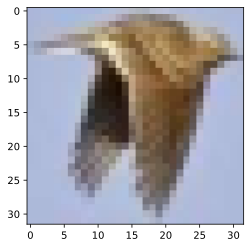

In [ ]:
plt.imshow(cdata_trans.data[123,:,:,:])

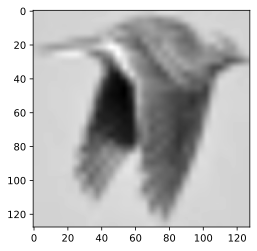

In [ ]:
plt.imshow(torch.squeeze(Ts(cdata_trans.data[123,:,:,:])), cmap= 'gray')

In [ ]:
# download the CIFAR10 dataset

cdata = torchvision.datasets.CIFAR10(root= 'cifar10', download= True)

print(cdata)

In [ ]:
# inspect the data

# the categories (but how many letters??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata.targets))
print(type(cdata.data))

# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]

# transform to 4D tensor for conv layers (and transform from int8 to float)
# images = cdata.data.view([numPics,numChans,numPixels,numPixels]).float()
# print('\nTensor data:')
# print(images.shape)

In [ ]:
Ts = T.Compose([T.ToTensor(),   # Compose function group together some transformers into one object
                T.Resize(32*4),
                T.Grayscale(num_output_channels= 1)
                ])
print(type(Ts))

# include the transform in the dataset
cdata.transform = Ts

print('Data Shape: ',cdata.data[123,:,:,:].shape)

# option 1: apply transform "externally" to an image
imageno = 123
img1 = Ts(cdata.data[imageno,:,:,:])

# option 2 : use the embedded transform
img2 = cdata.transform(cdata.data[imageno,:,:,:])

# let's see what we've done!
fig, ax = plt.subplots(1,3, figsize= (10, 3))
ax[0].imshow(cdata.data[imageno,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2), cmap= 'gray')

plt.show()

In [ ]:
print(type(img2))

In [ ]:
print(cdata.data.shape)

In [ ]:
# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]



## Change the type of data to Tensor in 4Dimensions


In [ ]:
print(cdata)

In [ ]:
print(cdata.data.shape)

In [ ]:
print(type(cdata.data))

In [ ]:
# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata.data)
print(type(cdataT))

In [ ]:
# Check the shape of the torch
print(cdataT.shape)

In [ ]:
# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)

numPics = cdataT.data.shape[0]
numPixels = cdataT.data.shape[1]
numChans = cdataT.data.shape[3]

# print(numPics)
# print(numPixels)
# print(numChans)
print('Original data Shape:\n',cdataT.data.shape)

images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

In [ ]:

print(len(cdata.targets))
print(type(cdata.targets))
print(type(cdata.targets[0]))

In [ ]:
# Converting the targets to torch tensor
labelsT = torch.tensor(cdata.targets)
print(type(labelsT))
print(labelsT.shape)

In [ ]:
# Finding the final label for the pics
for i in range(10):
    print(cdata.classes[cdata.targets[i]])

In [ ]:
random_list = np.random.randint(1, 100, 10)
random_list

In [ ]:
# make a visualization of the number of images in each category
plt.hist(images[:,:,:,:].view(1,-1).detach(), 10)
plt.title('Number of Images in Each category')
plt.show()

In [ ]:
plt.hist(labelsT.view(1,-1).detach(), 10)
plt.title('Number of pics in each category')
plt.xticks(ticks = range(0,10))
plt.show()

In [ ]:
# a function that trains the model

# def function2trainTheModel():

# number of epochs
numepochs = 1

# create a new model
net, lossfun, optimizer = createTheCIFARNet()

# send the model to the GPU           -------------->   GPU
net.to(device)

# initialize losses
losses    = torch.zeros(numepochs)
trainAcc  = []
testAcc   = []


# loop over epochs
for epochi in range(numepochs):

    # loop over training data batches
    # net.train()
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

        # push data to GPU          -------------->   GPU
        X = X.to(device)
        y = y.to(device)

        # forward pass and loss
        yHat = net(X)
        loss = lossfun(yHat,y)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss from this batch
        batchLoss.append(loss.item())

        # compute accuracy
        matches = torch.argmax(yHat,axis=1) == y                # booleans (false/true)
        matchesNumeric = matches.float()                        # convert to numbers (0/1)
        accuracyPct = 100*torch.mean(matchesNumeric).item()     # average and x100
        batchAcc.append( accuracyPct )                          # add to list of accuracies

    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    print(type(batchAcc))
    print(type(batchLoss))
    var0 = np.mean(batchAcc)
    trainAcc.append( var0 )
    # trainAcc.cpu().append( np.mean(batchAcc) )
    # trainAcc.append( np.mean(batchAcc.cpu()) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader

    # push data to GPU          -------------->   GPU
    X = X.to(device)
    y = y.to(device)

    with torch.no_grad():     # deactivates autograd
        yHat = net(X)
    
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item() )

# end epochs

# function output
# return trainAcc,testAcc,losses,net


# Program start  Using GPU in this program
## read the data, convert to tensor, train the model with 3 convolotion max pooling

## with 30 epoch, accuracy <45 and time 15 mins with CPU

## with 60 epoch, accuracy <45 and time 30 mins with CPU


In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# for getting summary info on models
from torchsummary import summary

In [2]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
# download the CIFAR10 dataset

cdata = torchvision.datasets.CIFAR10(root= 'cifar10', download= True)

print(cdata)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [4]:
# inspect the data

# the categories (but how many classes??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata.targets))
print(type(cdata.data))

# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata.data)
print('\nAfter converting: \n')
print(type(cdataT))

# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)
print('\nOriginal data Shape:\n',cdataT.data.shape)

# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]

images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>

After converting: 

<class 'torch.Tensor'>

Original data Shape:
 torch.Size([50000, 32, 32, 3])

Tensor data:
 torch.Size([50000, 3, 32, 32])


In [5]:
# Converting the targets to torch tensor
labelsT = torch.tensor(cdata.targets).long()
print(type(labelsT))
print(labelsT.shape)
print(torch.unique(labelsT))

<class 'torch.Tensor'>
torch.Size([50000])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [6]:
# Finding the final label for the pics
random_list = np.random.randint(1, 100, 10)
for i in random_list:
    print(cdata.classes[cdata.targets[i]])

truck
bird
bird
truck
dog
cat
bird
truck
dog
truck


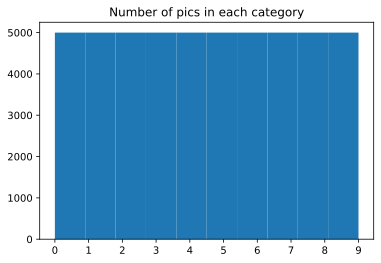

In [7]:
plt.hist(labelsT.view(1,-1).detach(), 10)
plt.title('Number of pics in each category')
plt.xticks(ticks = range(0,10))
plt.show()

## Create train/test groups using DataLoader

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labelsT, test_size= 0.1)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [9]:
# checking the size of train data and train labels

print(len(next(iter(train_loader))[0]))
print(len(next(iter(train_loader))[1]))
# print(next(iter(train_loader)))
train_loader.dataset.tensors[0].shape

32
32


torch.Size([45000, 3, 32, 32])

### Create the DL model

In [10]:
# create a class for the model
def createTheCIFARNet(printtoggle=False):

  class cifarNet(nn.Module):
    def __init__(self,printtoggle):
      super().__init__()

      ### convolution layers
      self.conv1 = nn.Conv2d( 3,10,kernel_size=5,stride=1,padding=1)
      # size : np.floor((32 + 2*1 - 5)/1 ) + 1 = 30  ---> maxpool --> 30/2 = 15

      self.conv2 = nn.Conv2d(10,20,kernel_size=5,stride=1,padding=1)
      # size: np.floor(( 15 + 2*1 - 5)/1) + 1 = 13 ---> maxpool --> 13/2 = 6

      self.conv3 = nn.Conv2d(20, 40, kernel_size = 3, stride= 1, padding=1)
      # size: np.floor(( 6 + 2*1 - 5)/1) + 1 = 6 ---> maxpool --> 6/2 = 3

      # compute the number of units in FClayer (number of outputs of conv3)
      expectSize = np.floor( (3+2*0-1)/1 ) + 1 # =3.0 fc1 layer has no padding or kernel, so set to 0/1
      expectSize = 40*int(expectSize**2)
      
      ### fully-connected layer
      self.fc1 = nn.Linear(expectSize,50)

      ### output layer
      self.out = nn.Linear(50,10)

      # toggle for printing out tensor sizes during forward prop
      self.print = printtoggle

    # forward pass
    def forward(self,x):
      
      print(f'Input: {x.shape}') if self.print else None

      # convolution -> maxpool -> relu
      x = F.relu(F.max_pool2d(self.conv1(x),2))
      print(f'Layer conv1/pool1: {x.shape}') if self.print else None

      # and again: convolution -> maxpool -> relu
      x = F.relu(F.max_pool2d(self.conv2(x),2))
      print(f'Layer conv2/pool2: {x.shape}') if self.print else None

      # and again: convolution -> maxpool -> relu
      x = F.relu(F.max_pool2d(self.conv3(x),2))
      print(f'Layer conv3/pool3: {x.shape}') if self.print else None
      
      # reshape for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))
      if self.print: print(f'Vectorize: {x.shape}')
      
      # linear layers
      x = F.relu(self.fc1(x))
      if self.print: print(f'Layer fc1: {x.shape}')
      x = self.out(x)
      if self.print: print(f'Layer out: {x.shape}')

      return x
  
  # create the model instance
  net = cifarNet(printtoggle)
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net, lossfun, optimizer

In [16]:
# test the model with one batch
net,lossfun,optimizer = createTheCIFARNet(True)

# send the model to the GPU           -------------->   GPU
net.to(device)
X,y = iter(train_loader).next()

# push data to GPU          -------------->   GPU
X = X.to(device)
y = y.to(device)
yHat = net(X)

# check sizes of model outputs and target variable
print(' ')
print(yHat.shape)
print(y.shape)

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

Input: torch.Size([32, 3, 32, 32])
Layer conv1/pool1: torch.Size([32, 10, 15, 15])
Layer conv2/pool2: torch.Size([32, 20, 6, 6])
Layer conv3/pool3: torch.Size([32, 40, 3, 3])
Vectorize: torch.Size([32, 360])
Layer fc1: torch.Size([32, 50])
Layer out: torch.Size([32, 10])
 
torch.Size([32, 10])
torch.Size([32])
 
Loss:
tensor(6.1329, device='cuda:0', grad_fn=<NllLossBackward0>)


In [17]:
# count the total number of parameters in the model
summary(net,(3,32,32))

Input: torch.Size([2, 3, 32, 32])
Layer conv1/pool1: torch.Size([2, 10, 15, 15])
Layer conv2/pool2: torch.Size([2, 20, 6, 6])
Layer conv3/pool3: torch.Size([2, 40, 3, 3])
Vectorize: torch.Size([2, 360])
Layer fc1: torch.Size([2, 50])
Layer out: torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 30, 30]             760
            Conv2d-2           [-1, 20, 13, 13]           5,020
            Conv2d-3             [-1, 40, 6, 6]           7,240
            Linear-4                   [-1, 50]          18,050
            Linear-5                   [-1, 10]             510
Total params: 31,580
Trainable params: 31,580
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.11
Params size (MB): 0.12
Estimated Total Size (MB): 0.24
------------------------------------

### Create a function that trains the model

In [44]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 100
  
  # create a new model
  net, lossfun, optimizer = createTheCIFARNet()

  # send the model to the GPU           -------------->   GPU
  net.to(device)

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    # net.train()
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # push data to GPU          -------------->   GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric).item() # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    # trainAcc.cpu().append( np.mean(batchAcc) )
    # trainAcc.append( np.mean(batchAcc.cpu()) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader

    # push data to GPU          -------------->   GPU
    X = X.to(device)
    y = y.to(device)

    with torch.no_grad():     # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item() )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


In [45]:
%%time
trainAcc,testAcc,losses,net = function2trainTheModel()

CPU times: user 14min 16s, sys: 21.9 s, total: 14min 38s
Wall time: 14min 36s


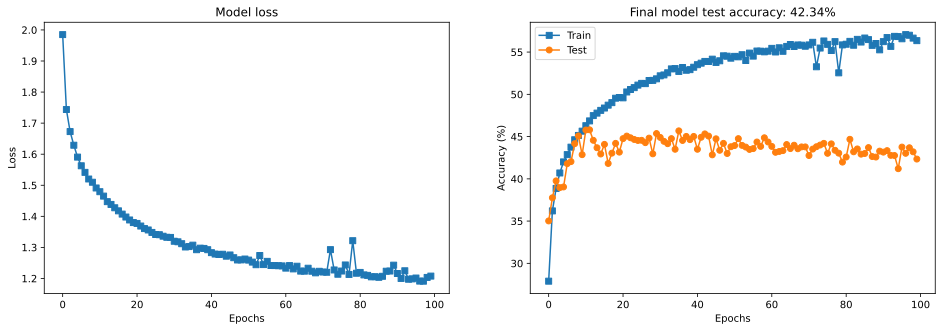

In [46]:
#  GPU   ---->  100 epochs    ------------> about 14 mins to proccess  Accuracy Test 42%

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [ ]:
6#    30 epochs    ------------> about  15  mins to proccess


fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()